# Day 20: Trench Map

In [1]:
from collections import defaultdict

import numpy as np
from PIL import Image, ImageDraw

In [2]:
def load_input(filename):
    with open(filename) as fr:
        first_line = fr.readline().strip()
        assert len(first_line) == 512
        algorithm = {
            i: 1 if char == '#' else 0
            for i, char in enumerate(first_line)
        }
        fr.readline()  # Empty line
        dots = defaultdict(int)
        for y, line in enumerate(fr.readlines()):
            for x, char in enumerate(line.strip()):
                if char == "#":
                    dots[x, y] = 1
        max_x = x + 1
        max_y = y + 1
        image = np.zeros((max_y, max_x))
        for x, y in dots:
            image[y][x] = dots[x, y]
    return algorithm, image

```
#..#.
#....
##..#
..#..
..###
```

In [3]:
algorithm, imagen = load_input('20-sample.txt')
imagen

array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1.]])

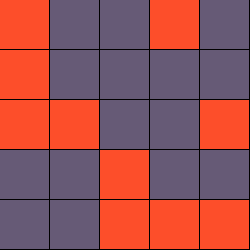

In [4]:
def iter_matrix(matrix):
    max_y, max_x = matrix.shape
    for y in range(max_y):
        for x in range(max_x):
            yield x, y, matrix[y, x]
            
def show_matrix(matrix, scale=5):
    width, height = matrix.shape
    img = Image.new('RGB', (width * scale, height * scale))
    dot_size = max(1, scale - 2)
    draw = ImageDraw.Draw(img)
    for x, y, value in iter_matrix(matrix):
        box = (x*scale, y*scale, x*scale+dot_size, y*scale+dot_size)
        if value in [1, '#']:          
            color = "#fd4e2a"
        else:
            color = "#665a76"
        draw.rectangle(box, fill=color)
    return img
                
algorithm, matrix = load_input('20-sample.txt')            
display(show_matrix(matrix, scale=50))

In [5]:
def expand_area(x, y):
    for delta_y in range(-1, 2):
        for delta_x in range(-1, 2):
            yield x+delta_x, y+delta_y
            
assert list(expand_area(0, 0)) == [
    (-1, -1),
    (0, -1),
    (1, -1),
    (-1, 0),
    (0, 0),
    (1, 0),
    (-1, 1),
    (0, 1),
    (1, 1),    
]

So, to determine the value of the pixel at `(5,10)` in the output image, nine pixels from the input image need to be considered: `(4,9)`, `(4,10)`, `(4,11)`, `(5,9)`, `(5,10)`, `(5,11)`, `(6,9)`, `(6,10)`, and `(6,11)`.

In [6]:
assert set(expand_area(5, 10)) == set([
    (4, 9),
    (4, 10),
    (4, 11),
    (5, 9),
    (5, 10),
    (5, 11),
    (6, 9),
    (6, 10),
    (6, 11),    
])

In [7]:
def read_enhanced_value(matrix, x, y):
    # print(f'Analysing {x}, {y}')
    buff = []
    for (_x, _y) in expand_area(x, y):
        if matrix[_y][_x] != 0:
            buff.append('1')
        else:
            buff.append('0')
    assert len(buff) == 9
    s_byte = ''.join(buff)
    return int(s_byte, 2)

In [8]:
def enhance(matrix, algorithm, filled=0):
    matrix = np.pad(matrix, 2, 'constant', constant_values = filled)
    height, width = matrix.shape
    result = np.zeros((height-2, width-2))
    # print('shapes: ', matrix.shape, result.shape)
    for y in range(1, height-1):
        for x in range(1, width-1):
            byte_index = read_enhanced_value(matrix, x, y)
            new_bit = algorithm[byte_index]
            tron = False
            if tron:
                print(f"{x-1},{y-1} new bit is {new_bit} for position {byte_index}")
            result[y-1][x-1] = int(new_bit)
    # print()
    return result

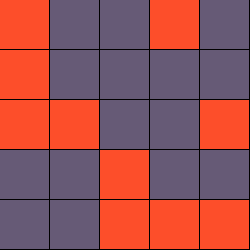

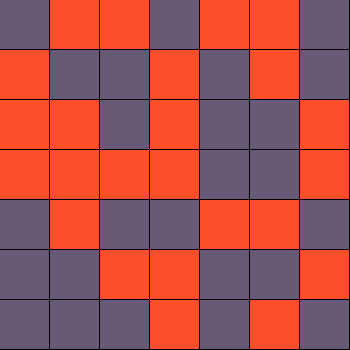

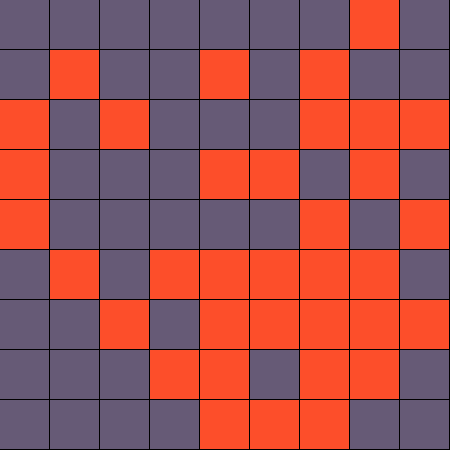

In [9]:
a, m = load_input('20-sample.txt')   
display(show_matrix(m, scale=50))
m1 = enhance(m, a)
display(show_matrix(m1, scale=50))
m2 = enhance(m1, a)
display(show_matrix(m2, scale=50))


In [10]:
algorithm, matrix = load_input('20-sample.txt')
matrix = enhance(matrix, algorithm)
matrix = enhance(matrix, algorithm)
assert matrix.sum() == 35

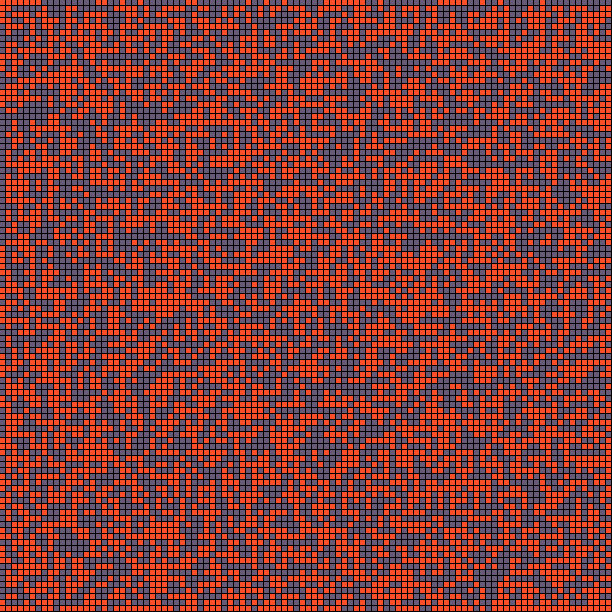

In [11]:
algorithm, matrix = load_input('20-input.txt')   
for _ in range(1):
    matrix = enhance(matrix, algorithm)
display(show_matrix(matrix, scale=6))

## Solution part one

In [12]:
algorithm, matrix = load_input('20-input.txt')
assert len(algorithm) == 512
assert matrix.shape == (100, 100)

In [13]:
algorithm, matrix = load_input('20-input.txt')
matrix = enhance(matrix, algorithm, filled=0)
matrix = enhance(matrix, algorithm, filled=1)
sol = matrix.sum()
print(f'Solution part one: {sol}')

Solution part one: 5571.0


## Solution part two

In [14]:
import itertools

filled = itertools.cycle([0, 1])

algorithm, matrix = load_input('20-input.txt')
for _ in range(50):
    matrix = enhance(matrix, algorithm, filled=next(filled))
sol = matrix.sum()
print(f'Solution part two: {sol}')

Solution part two: 17965.0
